In [38]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from nltk.tokenize import word_tokenize


In [39]:
# Download stopwords, punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Taha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1. Data Loading:

In [40]:
# Load the dataset into a pandas DataFrame.
# Display the first few rows of the dataset to understand its structure

In [41]:
# Load the dataset
df = pd.read_csv('sample_customer_feedback.csv')

# Display the first few rows of the dataset
df.head()

,Customer_ID,Feedback_Date,Product_ID,Rating,Comments
0,1,2/16/2018,P001,1,Like start nearly grow add film.
1,2,4/13/2018,P002,4,Whom still case door certain century mean abil...
2,3,2/2/2018,P003,1,Follow new special beat address.
3,4,4/8/2018,P004,5,Development strong lose send certain say health.
4,5,2/22/2018,P005,3,Seem response quickly budget.


2. Missing Values:

In [42]:
# Identify columns with missing values.
# Decide on a strategy to handle missing values (e.g., imputation, removal).
# Implement the chosen strategy and update the dataset accordingly.

In [43]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Customer_ID      0
Feedback_Date    0
Product_ID       0
Rating           0
Comments         0
dtype: int64

3. Data Types:

In [44]:
# Check the data types of each column.
# Ensure that Feedback_Date is in datetime format.
# Convert Rating to a numeric type if it is not already.
# Ensure that Comments is treated as a string.

In [45]:
# Check the data types of each column.
df.dtypes

Customer_ID       int64
Feedback_Date    object
Product_ID       object
Rating            int64
Comments         object
dtype: object

In [46]:
#  Convert Feedback_Date is in datetime format
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'], errors='coerce')

In [47]:
# Check invalid date
df[df['Feedback_Date'].isnull()]

,Customer_ID,Feedback_Date,Product_ID,Rating,Comments
29,30,NaT,P030,4,Central line listen stock key.
44,45,NaT,P045,2,Concern recently risk participant whatever.
105,106,NaT,P106,4,Room anyone official morning.
194,195,NaT,P195,2,Pass soldier technology especially road.


In [48]:
# 2018 was not a leap year, so February 29th, 2018, is an invalid date.
# Replace the invalid date with March 1st, 2018
for index in df[df['Feedback_Date'].isnull()].index:
  df.loc[index, 'Feedback_Date'] = pd.to_datetime('2018-03-01')

In [49]:
# Check invalid date
df[df['Feedback_Date'].isnull()]

,Customer_ID,Feedback_Date,Product_ID,Rating,Comments


In [50]:
# Feedback_Date is in datetime format.
# Rating is numeric.
# Comments is string.
df.dtypes

Customer_ID               int64
Feedback_Date    datetime64[ns]
Product_ID               object
Rating                    int64
Comments                 object
dtype: object

4. Duplicates:

In [51]:
# Identify and remove any duplicate rows in the dataset.
df.duplicated().sum()

np.int64(0)

5. Text Processing:

In [52]:
# Clean the Comments column:
  # Remove any extra whitespace.
  # Convert text to lowercase.
  # Remove punctuation.
  # Remove any stop words (optional).
# Tokenize the comments (split into individual words).

In [53]:
# Analyze the comments in the Comments column.
df['Comments'].head()

0                     Like start nearly grow add film.
1    Whom still case door certain century mean abil...
2                     Follow new special beat address.
3     Development strong lose send certain say health.
4                        Seem response quickly budget.
Name: Comments, dtype: object

In [54]:
def clean_comments(comment):
  # Remove extra whitespcae
  comment = comment.strip()
  # Convert to lowercase
  comment = comment.lower()
  # Remove punctuation
  comment = comment.translate(str.maketrans("", "", string.punctuation))
  # Tokenize the comment
  words = word_tokenize(comment)
  return ' '.join(words)

# Apply cleaning function to the 'Comments' cloumn
df['Comments'] = df['Comments'].apply(clean_comments)

# Display cleaned comments
df['Comments'].head()

0                      like start nearly grow add film
1    whom still case door certain century mean ability
2                      follow new special beat address
3      development strong lose send certain say health
4                         seem response quickly budget
Name: Comments, dtype: object

6. Exploratory Data Analysis (EDA):

In [55]:
# Ratings Distribution:
  # Plot the distribution of ratings (e.g., histogram).
  # Calculate the average rating.
# Frequent Words:
  # Identify the most frequently occurring words in the Comments column.
  # Create a word cloud visualization (optional).
# Trend Analysis:
  # Analyze the trend of ratings over time using the Feedback_Date column.
  # Plot a time series graph to visualize changes in ratings.

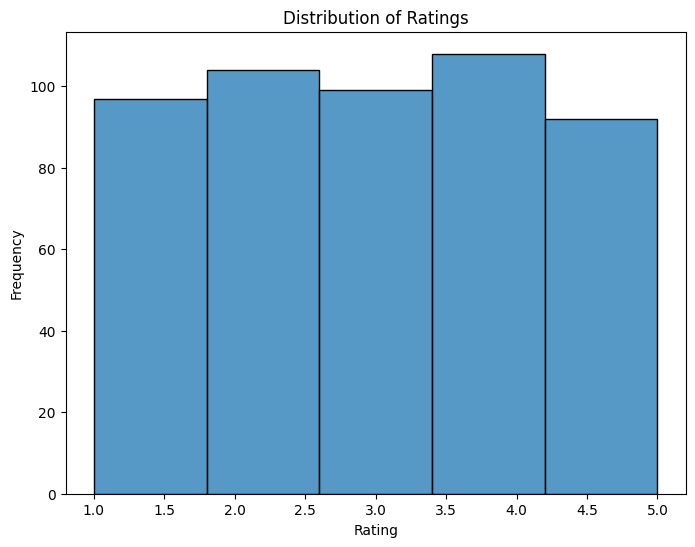

Average Rating: 2.988


In [72]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Save the plot as an image (e.g., "ratings_distribution.png")
plt.savefig('ratings_distribution.png')

# Show the plot
plt.show()

# Calculate the average rating
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

In [57]:
# Flatten the list of cleaned comments
all_words = [word for comment in df['Comments'] for word in comment.split()]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most frequently occurring words
most_frequently_occurring_words = word_counts.most_common(10)
print("Most Frequently Occurring Words:\n",most_frequently_occurring_words)

Most Frequently Occurring Words:
 [('camera', 12), ('wife', 10), ('admit', 10), ('perform', 8), ('drug', 8), ('past', 8), ('throw', 8), ('around', 8), ('skin', 8), ('at', 8)]


In [58]:
# Group by Feedback_Date and calculate average rating
df_trend = df.groupby('Feedback_Date')['Rating'].mean().reset_index()
df_trend.head()

,Feedback_Date,Rating
0,2018-01-01,4.5
1,2018-01-02,2.5
2,2018-01-04,2.0
3,2018-01-05,4.0
4,2018-01-06,3.0


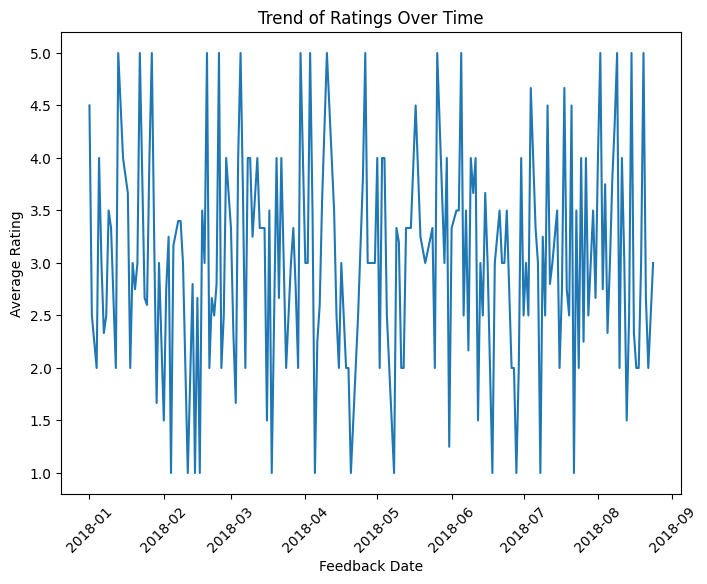

In [74]:
# Plot the time series graph
plt.figure(figsize=(8, 6))
sns.lineplot(x='Feedback_Date', y='Rating', data=df_trend)
plt.title('Trend of Ratings Over Time')
plt.xlabel('Feedback Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Save the plot as an image (e.g., "ratings_distribution.png")
plt.savefig('ratings_trend.png')

# Show the plot
plt.show()


In [69]:
# Saving the cleaned dataset to a new CSV file for submission
cleaned_file_path = 'sample_customer_feedback.csv'
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'sample_customer_feedback.csv'